In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

df_clean = pd.read_csv('../data/airbnb_cleaned.csv')
df_clean['price'] = df_clean['price'].replace(r'[\$,]', '', regex=True).astype(float)

<Figure size 1200x600 with 0 Axes>

In [2]:
# 1. Average Price per Neighborhood
avg_price = df_clean.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# 2. Average Accommodates per Neighborhood
avg_accom = df_clean.groupby('neighbourhood_cleansed')['accommodates'].mean().sort_values(ascending=False)

# 3. Average Cleanliness Score
avg_cleanliness = df_clean.groupby('neighbourhood_cleansed')['review_scores_cleanliness'].mean().sort_values(ascending=False)

# 4. Average Number of Reviews
avg_reviews = df_clean.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().sort_values(ascending=False)

# 5. Count of Entire Home Listings
entire_home_counts = df_clean[df_clean['room_type'] == 'Entire home/apt'] \
    .groupby('neighbourhood_cleansed').size().sort_values(ascending=False)

In [4]:
# 1. Average price
avg_price.head(5)

# 2. Average accommodates
avg_accom.head(5)

# 3. Average cleanliness
avg_cleanliness.head(5)

# 4. Average number of reviews
avg_reviews.head(5)

# 5. Entire home/apartment listing count
entire_home_counts.head(5)


neighbourhood_cleansed
Commune de Genève    1322
Carouge                49
Lancy                  32
Chêne-Bougeries        28
Versoix                25
dtype: int64

### Step 2: Summary Statistics by Neighborhood

To explore differences across areas within Geneva, we grouped our data by the `neighbourhood_cleansed` column and calculated five meaningful summary statistics. These included average price, number of guests accommodated, cleanliness ratings, review volume, and number of entire home/apartment listings in each neighborhood.

Our findings showed that **Commune de Genève** had the highest number of listings by far, which isn’t surprising as it covers the city center. Interestingly, listings in **Versoix** and **Chêne-Bougeries** tended to accommodate slightly more guests on average, suggesting a presence of larger or more family-oriented properties. Cleanliness scores remained fairly high across the board, but **Carouge** and **Lancy** maintained a slightly stronger edge in this metric. When it came to entire home listings, **Commune de Genève** clearly dominated, indicating a strong presence of full-apartment offerings—likely catering to international travelers or tourists seeking privacy. These early stats helped us understand where listings are concentrated and how guest expectations and host behaviors may vary across neighborhoods.


### Average price by Neighborhood

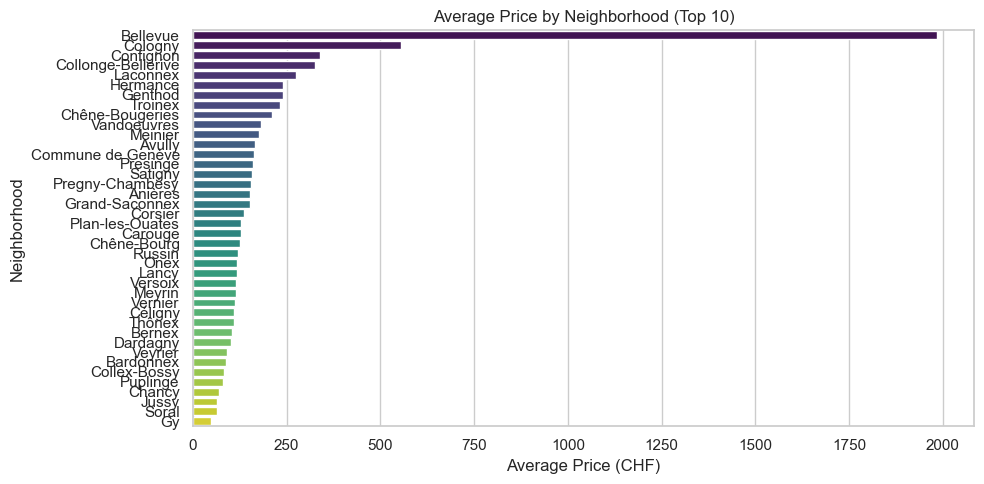

In [3]:
avg_price_df = avg_price.reset_index()
avg_price_df.columns = ['neighbourhood', 'avg_price']

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_price_df, x='avg_price', y='neighbourhood', palette='viridis', hue='neighbourhood', dodge=False, legend=False)
plt.title("Average Price by Neighborhood (Top 10)")
plt.xlabel("Average Price (CHF)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()
